In [10]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [11]:
# import dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [12]:
# implement thompson sampling
N = 10000
d = 10

ads_selected = []
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0,N):
    ad = 0
    max_random = 0
    for i in range(0,d):
        random_beta = random.betavariate(number_of_rewards_1[i]+1, number_of_rewards_0[i]+1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    if reward == 1:
        number_of_rewards_1[ad] = number_of_rewards_1[ad] + 1
    else:
        number_of_rewards_0[ad] = number_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

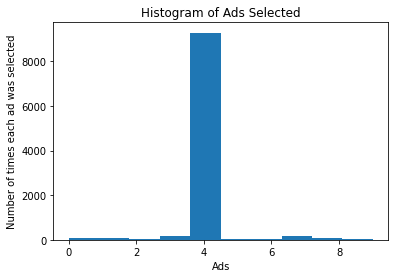

In [13]:
# visualize the results (histogram)
plt.hist(ads_selected)
plt.title('Histogram of Ads Selected')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()